## Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. Find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

### Step 1. Open the data file and have a look at the general information. 

In [255]:
import pandas as pd
credit_data = pd.read_csv('/datasets/credit_scoring_eng.csv')

print('Rows in DataFrame:', credit_data.shape[0])

Rows in DataFrame: 21525


In [256]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [257]:
print(credit_data.head(5))

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42    bachelor's degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0     40620.102   
1            married                 0      F    employee     0     17932.802   
2            married                 0      M    employee     0     23341.752   
3            married                 0      M    employee     0     42820.568   
4  civil partnership                 1      F     retiree     0     25378.572   

                   purpose  
0    purchase of the house 

# Conclusion

# There are missing values in the 'total_income' column and 'days_employed' column, negative number of days employed in the 'days_employed' column, duplicates with different cases in the 'education' column, 'days_employed' and 'total_income' are in the data float data type while all other number columns are in the int data type, and purposes are strings written in different ways in the 'purpose' column. There are also negative days employed.

### Step 2. Data preprocessing

### Processing missing values

In [258]:
#to see how rows with missing values look
print(credit_data[credit_data['days_employed'].isnull()])
print(credit_data[credit_data['total_income'].isnull()])

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

# The missing values in total_income and days_employed happen at the same columns, as seen through inspection. This means that if someone did not have a job, they did not fill in this information.

In [259]:
#to see how many values are missing
print(credit_data[credit_data['total_income'].isnull()].count())
print(credit_data[credit_data['days_employed'].isnull()].count())

children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64
children            2174
days_employed          0
dob_years           2174
education           2174
education_id        2174
family_status       2174
family_status_id    2174
gender              2174
income_type         2174
debt                2174
total_income           0
purpose             2174
dtype: int64


In [260]:
credit_data['total_income'] = credit_data['total_income'].fillna(0)
credit_data['days_employed'] = credit_data['days_employed'].fillna(0)

In [261]:
print(credit_data[credit_data['total_income'].isnull()])
print(credit_data[credit_data['days_employed'].isnull()])

Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []
Empty DataFrame
Columns: [children, days_employed, dob_years, education, education_id, family_status, family_status_id, gender, income_type, debt, total_income, purpose]
Index: []


### Conclusion

# The missing data in 'days_employed' and 'total_income' could be filled with 0 since these values were missing when someone did not have a job.

### Data type replacement

In [262]:

#the 'total income' and 'days_employed' columns have the float type so have to switch it to int type
#therefore, we will use the astype() method with 'int' as the parameter
credit_data['total_income'] = credit_data['total_income'].astype('int')
credit_data['days_employed'] = credit_data['days_employed'].astype('int')

credit_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


### Conclusion

# The 'total_income' and 'days_employed' columns had the float type so they had to be switched to int type. Therefore, I used the astype() method with 'int' as the parameter. Now, there are no missing values, all columns with numbers are in the int64 data type, and the columns with words are all strings.

### Processing duplicates

In [263]:
credit_data.loc[credit_data['children'] == -1, 'children'] = 1

In [264]:
print(credit_data['children'].value_counts())

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64


In [265]:
print(credit_data['education'].value_counts())

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64


In [266]:
credit_data['education'] = credit_data['education'].str.lower()

In [267]:
print(credit_data['education'].value_counts())

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


In [268]:
print(credit_data['family_status'].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


In [269]:
print(credit_data['gender'].value_counts())

F      14236
M       7288
XNA        1
Name: gender, dtype: int64


In [270]:
print(credit_data['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64


In [271]:
print(credit_data['purpose'].value_counts())

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
housing transactions                        653
buying property for renting out             653
transactions with commercial real estate    651
housing                                     647
purchase of the house                       647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [272]:
#use stemming to eliminate repeated purposes
from nltk.stem import SnowballStemmer
english_stemmer = SnowballStemmer('english')

#see what stems to use
words = ['car', 'education', 'university', 'wedding', 'estate', 'house', 'property', 'educated', 'housing']
for word in words:
    print('Source word:', word, 'after stemming:', english_stemmer.stem(word))

Source word: car after stemming: car
Source word: education after stemming: educ
Source word: university after stemming: univers
Source word: wedding after stemming: wed
Source word: estate after stemming: estat
Source word: house after stemming: hous
Source word: property after stemming: properti
Source word: educated after stemming: educ
Source word: housing after stemming: hous


In [273]:
#make a function to organize a column by stems
def stem_purpose(purpose):
    stems = [english_stemmer.stem(word) for word in purpose.split(' ')]
    if 'car' in stems:
        return 'car'
    if 'educ' in stems or 'univers' in stems:
        return 'education'
    if 'wed' in stems:
        return 'wedding'
    if 'estat' in stems or 'hous' in stems or 'properti' in stems:
        return 'real_estate/house'

#use the function to create a cleaner, more organized purpose column      
credit_data['purpose_clean'] = credit_data['purpose'].apply(stem_purpose)

#check if the code did what it was supposed to
print(credit_data['purpose_clean'].value_counts())
print(credit_data.head())

real_estate/house    10840
car                   4315
education             4022
wedding               2348
Name: purpose_clean, dtype: int64
   children  days_employed  dob_years            education  education_id  \
0         1          -8437         42    bachelor's degree             0   
1         1          -4024         36  secondary education             1   
2         0          -5623         33  secondary education             1   
3         3          -4124         32  secondary education             1   
4         0         340266         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0         40620   
1            married                 0      F    employee     0         17932   
2            married                 0      M    employee     0         23341   
3            married                 0      M    employee     0         42820

### Conclusion

# There were duplicates because customers were able to write their responses in different ways with a fill in the blank form. I used value_counts() to find duplicates. Because the 'education' column had different cases, which caused duplicates, I used the str.lower() method to make everything lowercase. I used stemming in the 'purpose' column because the column had duplicates of phrases that had words with the same stems. The 'purpose' column is now better organized in the 'purpose_clean' column.

### Categorizing Data

In [274]:
print(credit_data['children'].value_counts())

0     14149
1      4865
2      2055
3       330
20       76
4        41
5         9
Name: children, dtype: int64


In [275]:
def child_categorizer(children):
    if children <= 2:
        return 'less than 2'
    if 3 <= children <= 5:
        return 'between 3 and 5'
    if children > 5: 
        return 'more than 6'
credit_data['categorized_children'] = credit_data['children'].apply(child_categorizer)

In [276]:
print(credit_data['days_employed'].value_counts())

 0         2174
-327         16
-133         16
-438         15
-204         14
           ... 
-11220        1
-7126         1
 373727       1
 355300       1
-4058         1
Name: days_employed, Length: 9087, dtype: int64


In [277]:
def days_employed_categorizer(days_employed):
    if days_employed < 0:
        return 'unknown'
    if 0 <= days_employed <= 365:
        return 'less than 1 year'
    if 365 < days_employed <= 365*5:
        return 'between 1 and 5 years'
    if 365*5 < days_employed <= 365*10:
        return ' between 5 and 10 years'
    if days_employed > 365*10: 
        return 'more than 10 years'
credit_data['categorized_days_employed'] = credit_data['days_employed'].apply(days_employed_categorizer)

In [278]:
print(credit_data['dob_years'].value_counts())

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64


In [279]:
def dob_categorizer(dob_years):
    if dob_years <= 0:
        return 'unknown'
    if 1 <= dob_years <= 18:
        return 'child'
    if 18 < dob_years <= 23:
        return 'college student/adult'
    if 23 < dob_years <= 60:
        return 'adult'
    if dob_years > 60:
        return 'senior citizen'
credit_data['categorized_dob_years'] = credit_data['dob_years'].apply(dob_categorizer)

In [280]:
print(credit_data['total_income'].value_counts())

0         2174
19552        7
23344        6
17855        5
15835        5
          ... 
136538       1
34136        1
101842       1
13646        1
28678        1
Name: total_income, Length: 15389, dtype: int64


In [281]:
def total_income_categorizer(income):
    if income <= 31000:
        return 'lowest income'
    if 31000 < income <= 42000:
        return 'lower middle income'
    if 42000 < income <= 126000:
        return 'middle income'
    if 126000 < income <= 188000:
        return 'upper middle income'
    if income > 188000: 
        return 'higher income'
credit_data['categorized_total_income'] = credit_data['total_income'].apply(total_income_categorizer)

In [282]:
print(credit_data['education'].unique())

["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']


In [283]:
print(credit_data['gender'].unique())

['F' 'M' 'XNA']


In [284]:
print(credit_data['debt'].unique())

[0 1]


In [285]:
print(credit_data['family_status'].value_counts())

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64


In [286]:
print(credit_data['income_type'].value_counts())

employee                       11119
business                        5085
retiree                         3856
civil servant                   1459
unemployed                         2
entrepreneur                       2
paternity / maternity leave        1
student                            1
Name: income_type, dtype: int64


In [287]:
print(credit_data.head())

   children  days_employed  dob_years            education  education_id  \
0         1          -8437         42    bachelor's degree             0   
1         1          -4024         36  secondary education             1   
2         0          -5623         33  secondary education             1   
3         3          -4124         32  secondary education             1   
4         0         340266         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0         40620   
1            married                 0      F    employee     0         17932   
2            married                 0      M    employee     0         23341   
3            married                 0      M    employee     0         42820   
4  civil partnership                 1      F     retiree     0         25378   

                   purpose      purpose_clean categorize

In [288]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 17 columns):
children                     21525 non-null int64
days_employed                21525 non-null int64
dob_years                    21525 non-null int64
education                    21525 non-null object
education_id                 21525 non-null int64
family_status                21525 non-null object
family_status_id             21525 non-null int64
gender                       21525 non-null object
income_type                  21525 non-null object
debt                         21525 non-null int64
total_income                 21525 non-null int64
purpose                      21525 non-null object
purpose_clean                21525 non-null object
categorized_children         21525 non-null object
categorized_days_employed    21525 non-null object
categorized_dob_years        21525 non-null object
categorized_total_income     21525 non-null object
dtypes: int64(7), object(10)
me

### Conclusion

# I split up the 'children' column into categories: 0-2 children, 3-5 children, and more than 6 children (this was the 20 children fit into the more than 6 children column). Next, for the 'days_employed' column, the negative values are rubbish data so I will not include them in my categories. My categories are less than 1 year, between 1 and 5 years, between 5 and 10 years, and more than 10 years. I categorized the 'dob_years' column into child, college student/adult, adult, and senior citizen. Finally, I categorized 'total_income' into different level of income (lowest, lower-middle, middle, upper-middle, higher income). I included rubbish data (negative employment/ zero age) under the 'unknown' label. Now that this is categorized, it will be easier to analyze the data and see patterns.

# The 'purpose', 'family_status', 'income_type', 'gender', 'debt', and 'education' columns were already well categorized.

### Step 3. Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [289]:
credit_data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'sum', 'mean'])                                                       

,count,sum,mean
,debt,debt,debt
children,,,
0,14149,1063,0.075129
1,4865,445,0.091470
2,2055,194,0.094404
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000
20,76,8,0.105263


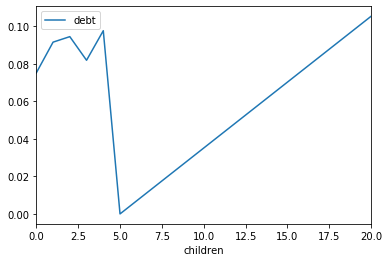

In [290]:
credit_data.pivot_table(index=['children'], values='debt', aggfunc='mean').plot()                                                    

# The people with 20 children are outliers and could be rubbish data. Only consider the graph up to 5 children.

In [291]:
credit_data.loc[credit_data['children'] == 20, 'children'] = 'unknown'

In [292]:
credit_data.pivot_table(index=['children'], values='debt', aggfunc=['count', 'mean'])                                                       

,count,mean
,debt,debt
children,,
0,14149,0.075129
1,4865,0.091470
2,2055,0.094404
3,330,0.081818
4,41,0.097561
5,9,0.000000
unknown,76,0.105263


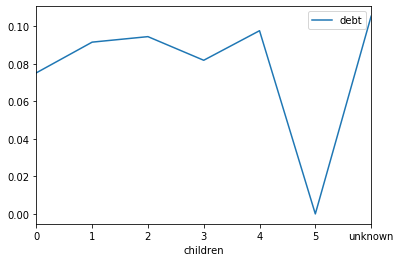

In [293]:
credit_data.pivot_table(index=['children'], values='debt', aggfunc='mean').plot()                                                    

# The debt seems about constant no matter how many children. (Although there is a drop to 0 debt at 5 children, the sample size of clients with 5 children is too small to consider.)

### Conclusion

# There is no relation between number of children and repaying a loan on time.

- Is there a relation between marital status and repaying a loan on time?

In [294]:
credit_data.pivot_table(index=['family_status'], values='debt', aggfunc=['count', 'mean'])                                                       

,count,mean
,debt,debt
family_status,,
civil partnership,4177,0.092890
divorced,1195,0.071130
married,12380,0.075202
unmarried,2813,0.097405
widow / widower,960,0.065625


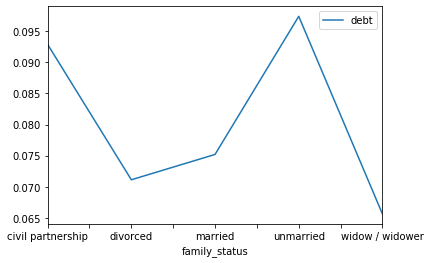

In [295]:
credit_data.pivot_table(index=['family_status'], values='debt', aggfunc='mean').plot()                                                      

### Conclusion

# From most likely to least likely to be in debt, we have unmarried, civil partnership, married, divorced, and widow/widower.  Unmarried people are most likely to be in debt. A widow/widower is least likely to be in debt.

- Is there a relation between income level and repaying a loan on time?

In [296]:
credit_data.pivot_table(index=['categorized_total_income'], values='debt', aggfunc=['count', 'mean'])                                                       

,count,mean
,debt,debt
categorized_total_income,,
higher income,13,0.076923
lower middle income,3140,0.073885
lowest income,16026,0.083989
middle income,2316,0.068653
upper middle income,30,0.100000


# The sample of higher income and upper middle income people is too small and we cannot reach good conclusions from that data. However, from the well represented categories, lowest income people are most likely to be in debt, followed by lower middle income people, and then middle income people, which are least likely to be in debt. It can be inferred that if the sample size was bigger, the upper middle income and higher income people would be even less likely to be in debt.

### Conclusion

# The relation is that people with a higher income are less likely to be in debt, which makes sense.

- How do different loan purposes affect on-time repayment of the loan?

In [297]:
credit_data.pivot_table(index=['purpose_clean'], values='debt', aggfunc=['count', 'mean'])                                                       

,count,mean
,debt,debt
purpose_clean,,
car,4315,0.093395
education,4022,0.091994
real_estate/house,10840,0.072140
wedding,2348,0.079216


### Conclusion

# People who take out a loan to buy a car are the most likely to be in debt, while people who want to invest in their education and wedding are less likely (in that order), while people who want to buy real estate or a house are the least likely to be in debt.

### Step 4. General conclusion

# From most likely to least likely to be in debt: 



# Based on number of children:
# no relation



# Based on family status:
# unmarried, civil partnership, married, divorced, and widow/widower



# Based on income status:
# lower to higher income



# Based on loan purpose:
# car, education, wedding, real estate/house


### Project Readiness Checklist

- [x]  file open;
- [X]  file examined;
- [X]  missing values defined;
- [X]  missing values are filled;
- [X]  an explanation of which missing value types were detected;
- [X]  explanation for the possible causes of missing values;
- [X]  an explanation of how the blanks are filled;
- [X]  replaced the real data type with an integer;
- [X]  an explanation of which method is used to change the data type and why;
- [X]  duplicates deleted;
- [X]  an explanation of which method is used to find and remove duplicates;
- [X]  description of the possible reasons for the appearance of duplicates in the data;
- [X]  data is categorized;
- [X]  an explanation of the principle of data categorization;
- [X]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [X]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [X]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [X]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [X]  conclusions are present on each stage;
- [X]  a general conclusion is made.